**Reliance Industries**

- Stock Forecast

**Business Objective:**

- Predict the Reliance Industries Stock Price for the next 30 days.
- There are Open, High, Low and Close prices that you need to obtain from the web for  day starting from 2000 to 2022 for Reliance Industries stock.

●	Split the last year into a test set- to build a model to predict stock price.

●	Find short term, & long term trends.

●	Understand how it is impacted from external factors or any big external events.

●	Forecast for next 1 year.


**Dataset Details**

- For this project, we downloaded the data from the Yahoo finance website.

- Collected data from 1-Jan-2000 to 11-Aug-2023.

- website link:

https://finance.yahoo.com/quote/RELIANCE.NS/history?period1=946684800&period2=1691366400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

Description:

Date: Date of trade

Open: Opening Price of Stock

High: Highest price of stock on that day

Low: Lowest price of stock on that day

Close: Close price adjusted for splits.

Adj Close: Adjusted close price adjusted for splits and dividend and/or capital gain distributions.

Volume: Volume of stock on that day

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
data=yf.download('RELIANCE.NS', start='2000-1-1', end='2023-8-11').reset_index(drop=False)
reliance_0 = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed


In [3]:
reliance_0.head(10)

Date       Open       High        Low      Close  Adj Close     Volume
0 2000-01-03  36.747459  38.944569  36.747459  38.944569  29.684204   28802010
1 2000-01-04  39.981236  42.062302  38.882679  42.062302  32.060585   61320457
2 2000-01-05  39.710464  44.545658  39.710464  43.710136  33.316589  173426953
3 2000-01-06  44.715855  46.526150  44.715855  45.543640  34.714123  101355113
4 2000-01-07  45.644211  49.187443  45.334759  48.669109  37.096401  128426756
5 2000-01-10  49.110077  49.311222  47.237892  47.733013  36.382900   86714866
6 2000-01-11  47.647915  48.112095  43.919018  44.638493  34.024200   81074352
7 2000-01-12  44.715855  47.191475  43.655979  46.680878  35.580936   78264129
8 2000-01-13  47.346199  48.955353  47.052219  48.251347  36.777969  110363002
9 2000-01-14  47.887741  49.767666  47.887741  48.939880  37.302780   86996234

In [4]:
reliance_0.tail(10)

Date         Open         High          Low        Close  \
5886 2023-07-28  2512.050049  2542.850098  2500.550049  2527.850098   
5887 2023-07-31  2527.850098  2553.899902  2517.949951  2549.250000   
5888 2023-08-01  2555.000000  2559.000000  2505.300049  2513.199951   
5889 2023-08-02  2509.199951  2512.000000  2463.600098  2486.350098   
5890 2023-08-03  2475.300049  2500.899902  2458.050049  2475.899902   
5891 2023-08-04  2498.800049  2516.000000  2471.600098  2509.550049   
5892 2023-08-07  2521.000000  2528.399902  2505.000000  2523.850098   
5893 2023-08-08  2528.000000  2534.449951  2499.550049  2508.649902   
5894 2023-08-09  2504.850098  2529.000000  2481.100098  2525.199951   
5895 2023-08-10  2524.949951  2550.000000  2508.449951  2536.449951   

        Adj Close    Volume  
5886  2527.850098  10413926  
5887  2549.250000   4275587  
5888  2513.199951   4768316  
5889  2486.350098   6374107  
5890  2475.899902   5084175  
5891  2509.550049  11442805  
5892  2523.850098   2991435  
5893  2508.649902   4922036  
5894  2525.199951   5743293  
5895  2536.449951   7735299

**> EDA**
- Analysis is only based on Close price and Volume

- There is no need of Open, High, Low, Adj Close


In [5]:
# Removing "Open, High, Low, Adj Close, Adj Close" columnfrom dataset
reliance_1=reliance_0.drop(["Open", "High", "Low", "Adj Close"],axis=1).reset_index(drop=True)
reliance_1

Date        Close     Volume
0    2000-01-03    38.944569   28802010
1    2000-01-04    42.062302   61320457
2    2000-01-05    43.710136  173426953
3    2000-01-06    45.543640  101355113
4    2000-01-07    48.669109  128426756
...         ...          ...        ...
5891 2023-08-04  2509.550049   11442805
5892 2023-08-07  2523.850098    2991435
5893 2023-08-08  2508.649902    4922036
5894 2023-08-09  2525.199951    5743293
5895 2023-08-10  2536.449951    7735299

[5896 rows x 3 columns]

In [6]:
# Finding duplicate columns, if any
reliance_1[reliance_1.duplicated()]

Empty DataFrame
Columns: [Date, Close, Volume]
Index: []

In [7]:
# Finding null values, if any
reliance_1.isnull().sum()

Date      0
Close     0
Volume    0
dtype: int64

In [8]:
#To check which rows have any missing value under any column
reliance_1[reliance_1.isnull().any(axis=1)]

Empty DataFrame
Columns: [Date, Close, Volume]
Index: []

In [9]:
# Removing the row which have null value
reliance_2=reliance_1.dropna().reset_index(drop=True)
reliance_2

Date        Close     Volume
0    2000-01-03    38.944569   28802010
1    2000-01-04    42.062302   61320457
2    2000-01-05    43.710136  173426953
3    2000-01-06    45.543640  101355113
4    2000-01-07    48.669109  128426756
...         ...          ...        ...
5891 2023-08-04  2509.550049   11442805
5892 2023-08-07  2523.850098    2991435
5893 2023-08-08  2508.649902    4922036
5894 2023-08-09  2525.199951    5743293
5895 2023-08-10  2536.449951    7735299

[5896 rows x 3 columns]

In [10]:
# Checking wether if there exist any null values
reliance_2[reliance_2.isnull().any(axis=1)]

Empty DataFrame
Columns: [Date, Close, Volume]
Index: []

In [11]:
# Making a copy of dataset as reliance
reliance=reliance_2.copy()
reliance

Date        Close     Volume
0    2000-01-03    38.944569   28802010
1    2000-01-04    42.062302   61320457
2    2000-01-05    43.710136  173426953
3    2000-01-06    45.543640  101355113
4    2000-01-07    48.669109  128426756
...         ...          ...        ...
5891 2023-08-04  2509.550049   11442805
5892 2023-08-07  2523.850098    2991435
5893 2023-08-08  2508.649902    4922036
5894 2023-08-09  2525.199951    5743293
5895 2023-08-10  2536.449951    7735299

[5896 rows x 3 columns]

- Descriptive Statistics

In [12]:
reliance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5896 entries, 0 to 5895
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5896 non-null   datetime64[ns]
 1   Close   5896 non-null   float64       
 2   Volume  5896 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 138.3 KB


In [13]:
reliance.describe()

Close        Volume
count  5896.000000  5.896000e+03
mean    684.286652  1.655188e+07
std     729.313895  1.794767e+07
min      31.440351  0.000000e+00
25%     114.702362  6.213322e+06
50%     455.494858  9.989949e+06
75%     795.075989  1.992348e+07
max    2841.850098  2.918015e+08

In [14]:
reliance.corr()

Close    Volume
Close   1.000000 -0.330992
Volume -0.330992  1.000000

@@ Close attribute is highly corelated.

In [15]:
# converting the date column in to datetime
reliance['Date']=pd.to_datetime(reliance['Date'],format='%Y-%m-%d')
reliance

Date        Close     Volume
0    2000-01-03    38.944569   28802010
1    2000-01-04    42.062302   61320457
2    2000-01-05    43.710136  173426953
3    2000-01-06    45.543640  101355113
4    2000-01-07    48.669109  128426756
...         ...          ...        ...
5891 2023-08-04  2509.550049   11442805
5892 2023-08-07  2523.850098    2991435
5893 2023-08-08  2508.649902    4922036
5894 2023-08-09  2525.199951    5743293
5895 2023-08-10  2536.449951    7735299

[5896 rows x 3 columns]

In [16]:
# Setting the date column as index
reliance=reliance.set_index('Date')
reliance

Close     Volume
Date                              
2000-01-03    38.944569   28802010
2000-01-04    42.062302   61320457
2000-01-05    43.710136  173426953
2000-01-06    45.543640  101355113
2000-01-07    48.669109  128426756
...                 ...        ...
2023-08-04  2509.550049   11442805
2023-08-07  2523.850098    2991435
2023-08-08  2508.649902    4922036
2023-08-09  2525.199951    5743293
2023-08-10  2536.449951    7735299

[5896 rows x 2 columns]

- Visualizations

Text(0.5, 1.0, 'Volume')

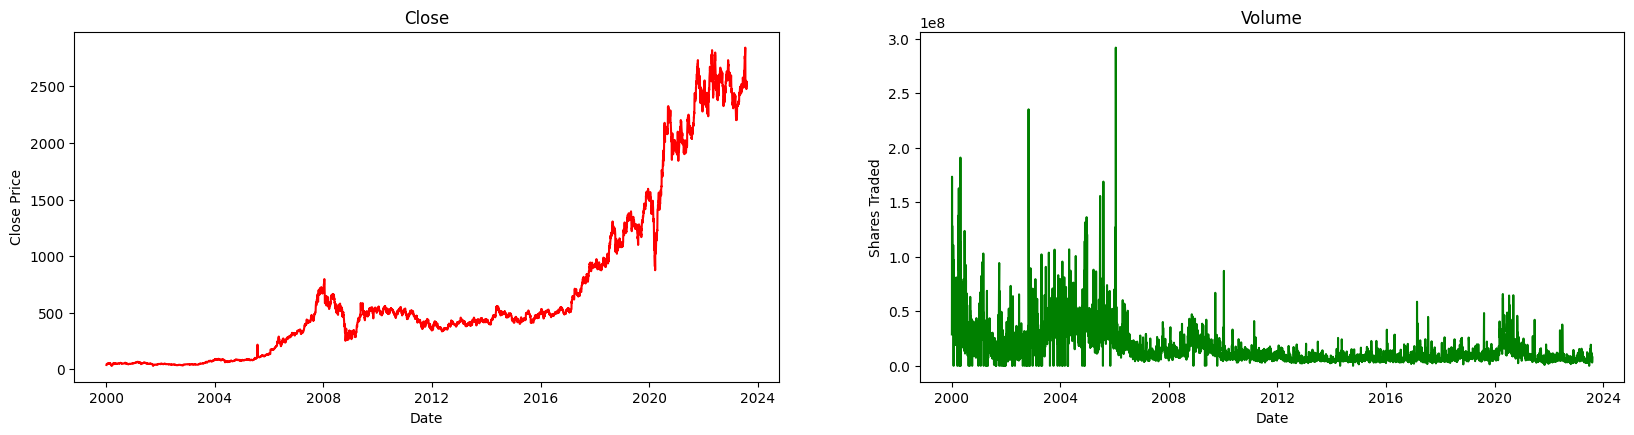

In [17]:
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.plot(reliance['Close'],color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close')
#Plot 2
plt.subplot(2,2,2)
plt.plot(reliance['Volume'],color='green')
plt.xlabel('Date')
plt.ylabel('Shares Traded')
plt.title('Volume')

In [18]:
# Creating box-plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.boxplot(reliance['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close')
#Plot 2
plt.subplot(2,2,2)
plt.boxplot(reliance['Volume'])
plt.xlabel('Date')
plt.ylabel('Shares Traded')
plt.title('Volume')

Text(0.5, 1.0, 'Volume')

there are no outliers inthe dataset

In [19]:
# Ploting Histogram
plt.figure(figsize=(20,18))
#Plot 1
plt.subplot(2,2,1)
plt.hist(reliance['Close'],bins=50, color='green')
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title('Close')
#Plot 2
plt.subplot(2,2,2)
plt.hist(reliance['Volume'],bins=50, color='red')
plt.xlabel("Shares Traded")
plt.ylabel("Frequency")
plt.title('Volume')

Text(0.5, 1.0, 'Volume')

Text(0.5, 1.0, 'Volume')

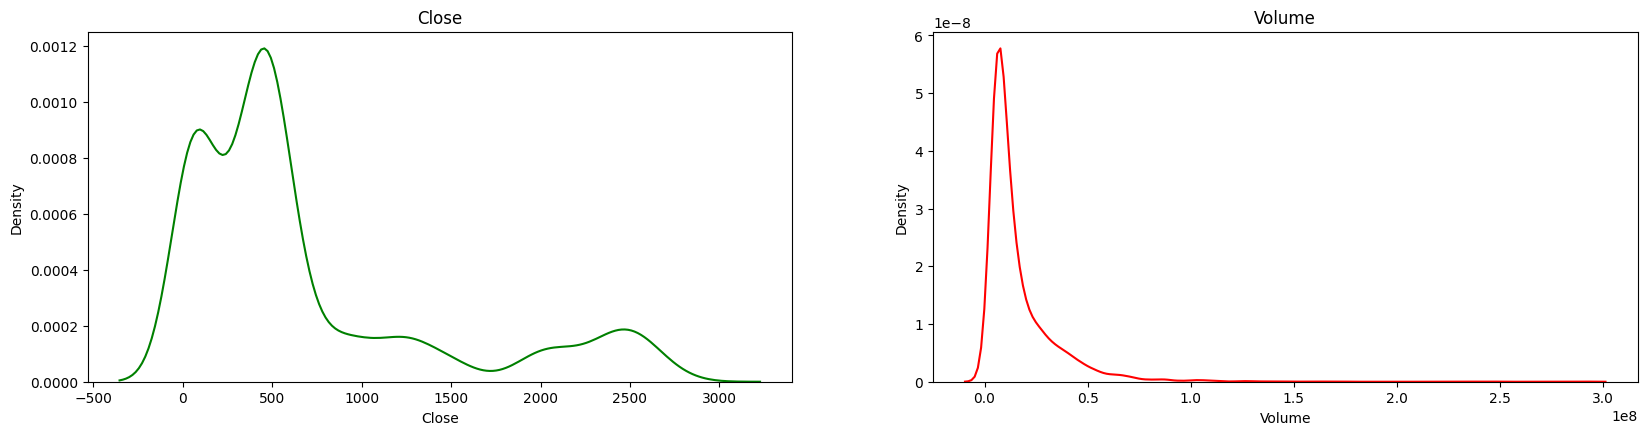

In [20]:
# KDE-Plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
sns.kdeplot(reliance['Close'], color='green')
plt.title('Close')
#Plot 2
plt.subplot(2,2,2)
sns.kdeplot(reliance['Volume'], color='red')
plt.title('Volume')

In [21]:
sns.heatmap(reliance.corr(),annot=True)
plt.show()

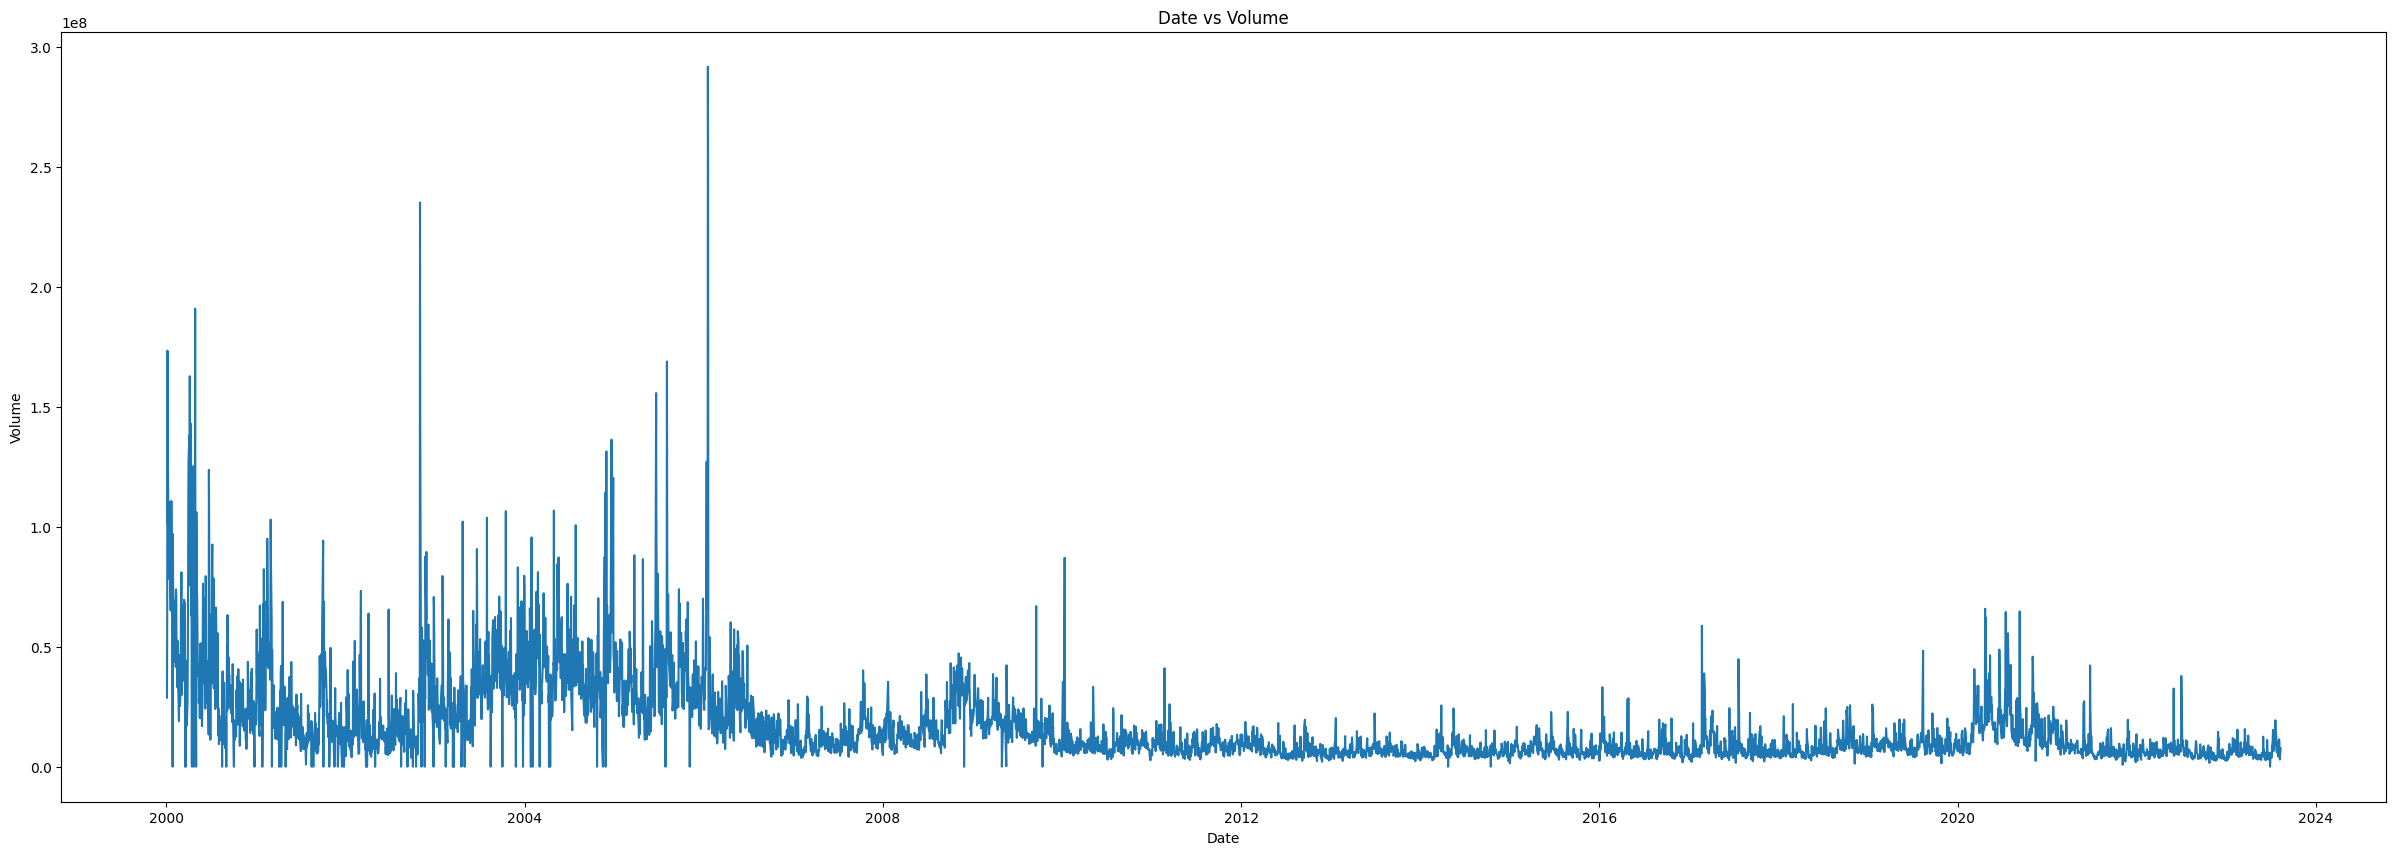

In [22]:
figure=plt.figure(figsize=(30,10))
plt.plot(reliance['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Date vs Volume')
plt.show()

- Finding long-term and short-term trends

Moving Average

In [23]:
reliance_ma=reliance.copy()
reliance_ma['30-day MA']=reliance['Close'].rolling(window=30).mean()
reliance_ma['200-day MA']=reliance['Close'].rolling(window=200).mean()

In [24]:
reliance_ma

Close     Volume    30-day MA   200-day MA
Date                                                        
2000-01-03    38.944569   28802010          NaN          NaN
2000-01-04    42.062302   61320457          NaN          NaN
2000-01-05    43.710136  173426953          NaN          NaN
2000-01-06    45.543640  101355113          NaN          NaN
2000-01-07    48.669109  128426756          NaN          NaN
...                 ...        ...          ...          ...
2023-08-04  2509.550049   11442805  2601.591667  2483.027009
2023-08-07  2523.850098    2991435  2601.895003  2483.602510
2023-08-08  2508.649902    4922036  2602.331665  2483.889509
2023-08-09  2525.199951    5743293  2603.289998  2484.046010
2023-08-10  2536.449951    7735299  2604.623332  2484.225259

[5896 rows x 4 columns]

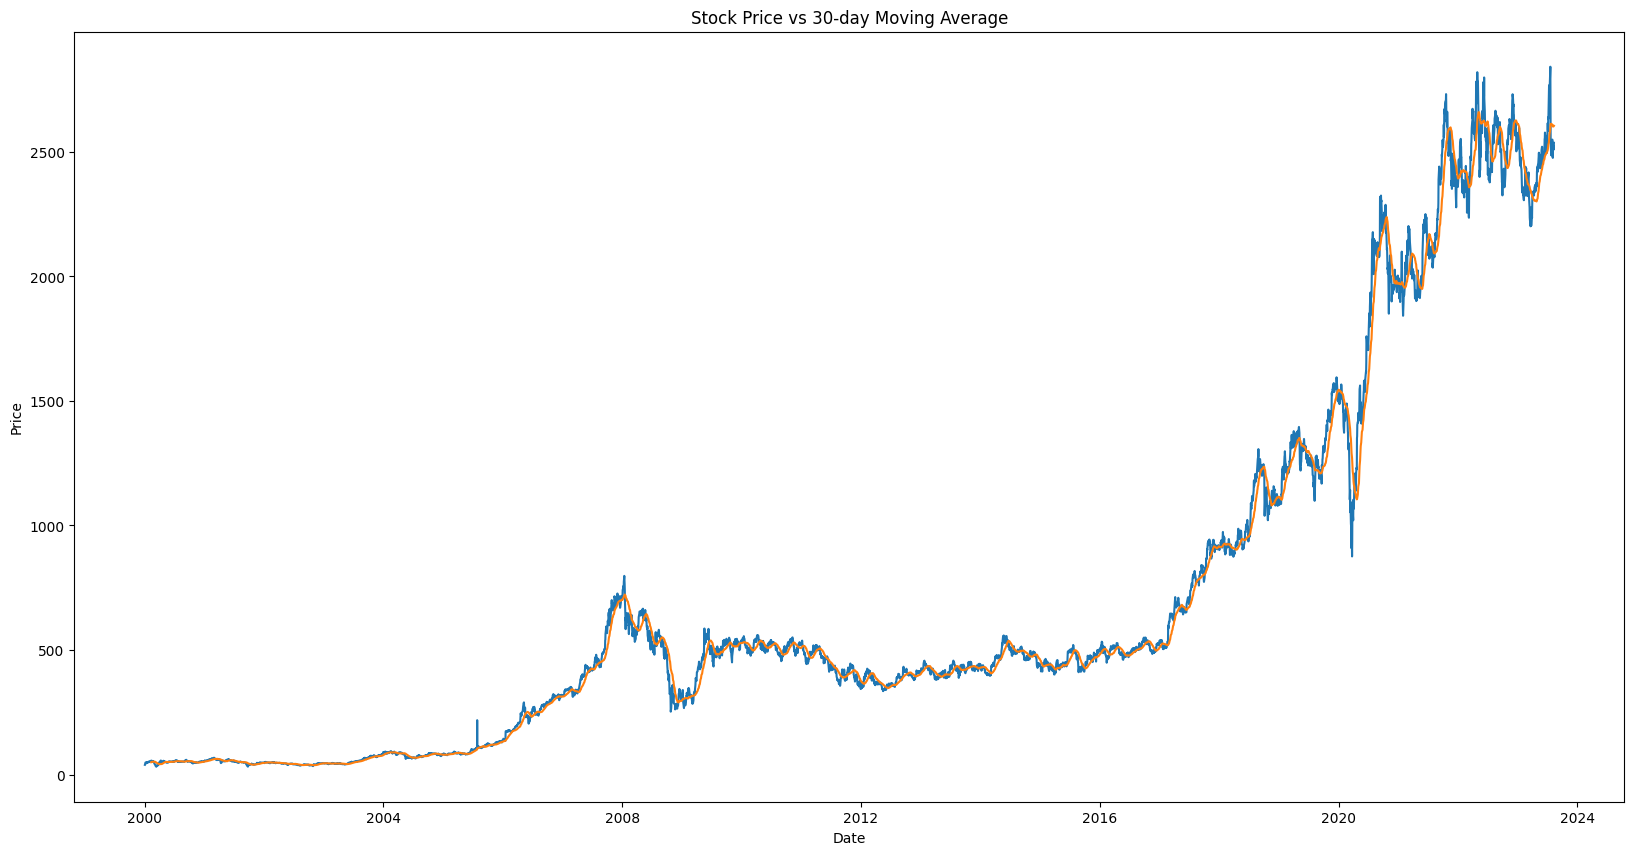

In [25]:
plt.figure(figsize=(20,10))
plt.plot(reliance_ma['Close'],label='Original data')
plt.plot(reliance_ma['30-day MA'],label='30-MA')
plt.legend
plt.title('Stock Price vs 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [26]:
plt.figure(figsize=(20,10))
plt.plot(reliance_ma['Close'],label='Original data')
plt.plot(reliance_ma['200-day MA'],label='200-MA')
plt.legend
plt.title('Stock Price vs 200-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Long term and short term trends can be identified using the Moving Average graphs

In long term, Stock price is in upward trend

Short term trends can be identified from MA-30 chart

Stock had a major short term downtrend during the year 2020

It may be due to the bearish market during the Covid-19 outbraek

 **> Model Building**

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [28]:
reliance

Close     Volume
Date                              
2000-01-03    38.944569   28802010
2000-01-04    42.062302   61320457
2000-01-05    43.710136  173426953
2000-01-06    45.543640  101355113
2000-01-07    48.669109  128426756
...                 ...        ...
2023-08-04  2509.550049   11442805
2023-08-07  2523.850098    2991435
2023-08-08  2508.649902    4922036
2023-08-09  2525.199951    5743293
2023-08-10  2536.449951    7735299

[5896 rows x 2 columns]

In [29]:
# Creating dataframe which only includes date and close time

close_df=pd.DataFrame(reliance['Close'])
close_df

Close
Date                   
2000-01-03    38.944569
2000-01-04    42.062302
2000-01-05    43.710136
2000-01-06    45.543640
2000-01-07    48.669109
...                 ...
2023-08-04  2509.550049
2023-08-07  2523.850098
2023-08-08  2508.649902
2023-08-09  2525.199951
2023-08-10  2536.449951

[5896 rows x 1 columns]

In [30]:
print(close_df.shape)

(5896, 1)


In [31]:
close_df=close_df.reset_index()

In [32]:
close_df['Date']

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
5891   2023-08-04
5892   2023-08-07
5893   2023-08-08
5894   2023-08-09
5895   2023-08-10
Name: Date, Length: 5896, dtype: datetime64[ns]

- Normalizing / scaling close value between 0 to 1

In [33]:
close_stock = close_df.copy()
del close_df['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(close_df).reshape(-1,1))
print(closedf.shape)

(5896, 1)


**Split data for training and testing**
- Ratio for training and testing data is 80:20

In [43]:
training_size=int(len(closedf)*0.80)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (4716, 1)
test_data:  (1180, 1)


- Create new dataset according to requirement of time-series prediction

In [44]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [45]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 13
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (4702, 13)
y_train:  (4702,)
X_test:  (1166, 13)
y_test (1166,)


> **Algorithms For Model Evaluation**

1. **Support vector regression - SVR**

In [46]:
import math
from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.01)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.01)

In [47]:
# Lets Do the prediction

train_predict=svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (4702, 1)
Test data prediction: (1166, 1)


In [48]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

- Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE),

 Mean Square Error (MSE) and

 Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [49]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  176.7197176365049
Train data MSE:  31229.858601526023
Test data MAE:  156.7783017201338
-------------------------------------------------------------------------------------
Test data RMSE:  580.6080447590986
Test data MSE:  337105.7016389834
Test data MAE:  530.8878563660749


- **Explained variance regression score**

The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [50]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.8408648576195803
Test data explained variance regression score: 0.795591847477009


R2 score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best

0 or < 0 = worse

In [51]:
train_r2_svr=r2_score(original_ytrain, train_predict)
test_r2_svr=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_svr)
print("Test data R2 score:", test_r2_svr)

Train data R2 score: 0.5307623001180161
Test data R2 score: -0.23248045212835056


- Comparision between original stock close price vs predicted close price

In [55]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (5896, 1)
Test predicted data:  (5896, 1)


**Predicting next 1 Year**

In [56]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 365
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = svr_rbf.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  365


- Plotting last 1 Year and next 1 Year

In [57]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[ 14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 2

In [58]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 365 days close price','Predicted next 365 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 365 days vs next 365 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

- Plotting whole closing stock price with prediction

In [59]:
svrdf=closedf.tolist()
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(svrdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

2. **Random Forest Regressor - RF**

In [60]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [61]:
# Lets Do the prediction

train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (4702, 1)
Test data prediction: (1166, 1)


In [62]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

**Evaluation metrices RMSE, MSE and MAE**

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [63]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  3.6973615367050776
Train data MSE:  13.670482333106133
Test data MAE:  2.1411048496900267
-------------------------------------------------------------------------------------
Test data RMSE:  914.1830217556263
Test data MSE:  835730.597266248
Test data MAE:  763.2297664578213


**Explained variance regression score**

The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [64]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9997946156184387
Test data explained variance regression score: 0.057817322989754394


R2 score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse

In [65]:
train_r2_rf=r2_score(original_ytrain, train_predict)
test_r2_rf=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_rf)
print("Test data R2 score:", test_r2_rf)

Train data R2 score: 0.9997945970307419
Test data R2 score: -2.0554856217747477


- Comparision between original stock close price vs predicted close price

In [66]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (5896, 1)
Test predicted data:  (5896, 1)


- Predicting next 1 Year

In [67]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 365
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = regressor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = regressor.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  365


- Plotting last 1 Year and next 1 Year

In [68]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[ 14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 2

In [69]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 365 days close price','Predicted next 365 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 365 days vs next 365 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

- Plotting whole closing stock price with prediction

In [70]:
rfdf=closedf.tolist()
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

3. **K-nearest neighgbour - KNN**

In [71]:
from sklearn import neighbors

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [72]:
# Lets Do the prediction

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (4702, 1)
Test data prediction: (1166, 1)


In [73]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [74]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  11.436942440522557
Train data MSE:  130.80365238782605
Test data MAE:  6.5010433899725575
-------------------------------------------------------------------------------------
Test data RMSE:  925.1108949464376
Test data MSE:  855830.1679485986
Test data MAE:  776.2306123585796


Explained variance regression score

The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [75]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9980347580713779
Test data explained variance regression score: 0.04252982913203629


R2 score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse

In [76]:
train_r2_knn=r2_score(original_ytrain, train_predict)
test_r2_knn=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_knn)
print("Test data R2 score:", test_r2_knn)

Train data R2 score: 0.9980346371155319
Test data R2 score: -2.128970964329703


**Comparision between original stock close price vs predicted close price**

In [77]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (5896, 1)
Test predicted data:  (5896, 1)


- Predicting next 1 Year

In [78]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 365
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = neighbor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = neighbor.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  365


- Plotting last 1 Year and next predicted 1 Year

In [79]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[ 14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 2

In [80]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 365 days close price','Predicted next 365 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 365 days vs next 365 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

- Plotting whole closing stock price with prediction

In [81]:
knndf=closedf.tolist()
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(knndf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

4. **LSTM**

In [82]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (4702, 13, 1)
X_test:  (1166, 13, 1)


LSTM model structure

In [83]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 13, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 13, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
147/147 [==============================] - 14s 39ms/step - loss: 0.0010 - val_loss: 0.0036
Epoch 2/100
147/147 [==============================] - 4s 26ms/step - loss: 6.6384e-05 - val_loss: 0.0046
Epoch 3/100
147/147 [==============================] - 5s 34ms/step - loss: 5.9669e-05 - val_loss: 0.0034
Epoch 4/100
147/147 [==============================] - 4s 26ms/step - loss: 6.5978e-05 - val_loss: 0.0041
Epoch 5/100
147/147 [==============================] - 4s 26ms/step - loss: 6.2842e-05 - val_loss: 0.0024
Epoch 6/100
147/147 [==============================] - 5s 34ms/step - loss: 5.9987e-05 - val_loss: 0.0031
Epoch 7/100
147/147 [==============================] - 4s 25ms/step - loss: 5.8199e-05 - val_loss: 0.0027
Epoch 8/100
147/147 [==============================] - 4s 26ms/step - loss: 5.5084e-05 - val_loss: 0.0048
Epoch 9/100
147/147 [==============================] - 5s 33ms/step - loss: 5.9398e-05 - val_loss: 0.0028
Epoch 10/100
147/147 [===========================

In [86]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

37/37 [==============================] - 0s 7ms/step


((4702, 1), (1166, 1))

In [87]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

- Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [88]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  8.976561608377947
Train data MSE:  80.5786583090049
Test data MAE:  5.377436196940952
-------------------------------------------------------------------------------------
Test data RMSE:  109.00482773351867
Test data MSE:  11882.052469214079
Test data MAE:  88.32070127196009


- Explained variance regression score

The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [89]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.998794895050018
Test data explained variance regression score: 0.9826528640103757


- R2 score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse

In [90]:
train_r2_lstm=r2_score(original_ytrain, train_predict)
test_r2_lstm=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_lstm)
print("Test data R2 score:", test_r2_lstm)

Train data R2 score: 0.9987892822453367
Test data R2 score: 0.9565584404883402


- Comparision between original stock close price vs predicted close price

In [91]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (5896, 1)
Test predicted data:  (5896, 1)


- Predicting next 1 Year

In [92]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 365
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  365


- Plotting last 1 Year and next prediced 1 Year

In [93]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[ 14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 2

In [94]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 365 days close price','Predicted next 365 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 365 days vs next 365 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

- Plotting whole closing stock price with prediction

In [95]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

5. **GRU (Gated Recurrent Unit)**

In [96]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (4702, 13, 1)
X_test:  (1166, 13, 1)


In [97]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [98]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 13, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 13, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 13, 32)            6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
147/147 [==============================] - 17s 45ms/step - loss: 7.2414e-04 - val_loss: 9.3822e-04
Epoch 2/100
147/147 [==============================] - 6s 43ms/step - loss: 4.4502e-05 - val_loss: 8.1317e-04
Epoch 3/100
147/147 [==============================] - 5s 34ms/step - loss: 4.4172e-05 - val_loss: 0.0016
Epoch 4/100
147/147 [==============================] - 6s 43ms/step - loss: 4.2773e-05 - val_loss: 0.0011
Epoch 5/100
147/147 [==============================] - 5s 35ms/step - loss: 3.9024e-05 - val_loss: 0.0014
Epoch 6/100
147/147 [==============================] - 5s 37ms/step - loss: 3.7437e-05 - val_loss: 0.0014
Epoch 7/100
147/147 [==============================] - 6s 41ms/step - loss: 3.4737e-05 - val_loss: 8.8221e-04
Epoch 8/100
147/147 [==============================] - 5s 36ms/step - loss: 3.7561e-05 - val_loss: 0.0015
Epoch 9/100
147/147 [==============================] - 6s 44ms/step - loss: 3.7535e-05 - val_loss: 6.2969e-04
Epoch 10/100
147/147 [=======

In [100]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

37/37 [==============================] - 0s 9ms/step


((4702, 1), (1166, 1))

In [101]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

 Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [102]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  9.707623036888958
Train data MSE:  94.23794502633717
Test data MAE:  7.0081829430447495
-------------------------------------------------------------------------------------
Test data RMSE:  145.52148497018476
Test data MSE:  21176.50258792771
Test data MAE:  116.37051925528316


- Explained variance regression score

The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [103]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9987747210356809
Test data explained variance regression score: 0.9686116224414514


R2 score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse

In [104]:
train_r2_gru=r2_score(original_ytrain, train_predict)
test_r2_gru=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_gru)
print("Test data R2 score:", test_r2_gru)

Train data R2 score: 0.9985840474934586
Test data R2 score: 0.9225773240939805


Comparision between original stock close price vs predicted close price

In [105]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)


names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (5896, 1)
Test predicted data:  (5896, 1)


In [106]:
plotdf.head(100)

Date  original_close  train_predicted_close  test_predicted_close
0  2000-01-03       38.944569                    NaN                   NaN
1  2000-01-04       42.062302                    NaN                   NaN
2  2000-01-05       43.710136                    NaN                   NaN
3  2000-01-06       45.543640                    NaN                   NaN
4  2000-01-07       48.669109                    NaN                   NaN
..        ...             ...                    ...                   ...
95 2000-05-15       49.435001              44.556023                   NaN
96 2000-05-16       49.110077              44.952438                   NaN
97 2000-05-17       49.334431              44.722519                   NaN
98 2000-05-18       47.980576              44.807880                   NaN
99 2000-05-19       48.831570              43.730755                   NaN

[100 rows x 4 columns]

- Predicting next 1 Year

In [107]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 365
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  365


- **Plotting last 1 Year and next 1 Year**

In [108]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[ 14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 2

In [109]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 365 days close price','Predicted next 365 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 365 days vs next 365 days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

- Plotting whole closing stock price with prediction

In [110]:
grudf=closedf.tolist()
grudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
grudf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])
fig = px.line(grudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [111]:
finaldf = pd.DataFrame({
    'svr':svrdf,
    'rf':rfdf,
    'knn':knndf,
    'lstm':lstmdf,
    'gru':grudf,
})
finaldf

svr           rf          knn        lstm          gru
0      38.944569    38.944569    38.944569   38.944569    38.944569
1      42.062302    42.062302    42.062302   42.062302    42.062302
2      43.710136    43.710136    43.710136   43.710136    43.710136
3      45.543640    45.543640    45.543640   45.543640    45.543640
4      48.669109    48.669109    48.669109   48.669109    48.669109
...          ...          ...          ...         ...          ...
6256  730.401592  1231.704180  1233.515202  771.295272  1050.611762
6257  730.401592  1231.704180  1231.751155  771.041489  1050.600204
6258  730.401592  1231.704180  1229.994732  770.788711  1050.588981
6259  730.401592  1231.704180  1224.203472  770.537022  1050.577841
6260  730.401592  1231.704180  1211.527475  770.286255  1050.566701

[6261 rows x 5 columns]

- **Conclusion Chart**

In [112]:
names = cycle(['SVR', 'RF','KNN','LSTM','GRU'])

fig = px.line(finaldf[225:], x=finaldf.index[225:], y=[finaldf['svr'][225:],finaldf['rf'][225:], finaldf['knn'][225:],
                                          finaldf['lstm'][225:], finaldf['gru'][225:],],
             labels={'x': 'Timestamp','value':'Stock close price'})
fig.update_layout(title_text='Final stock analysis chart', font_size=15, font_color='black',legend_title_text='Algorithms')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [114]:
data={"Model": ["SVR", "Random Forest", "KNN", "LSTM", "GRU"],
    "Train R2 Score": [train_r2_svr, train_r2_rf,train_r2_knn, train_r2_lstm, train_r2_gru],
    "Test R2 Score": [test_r2_svr, test_r2_rf, test_r2_knn, test_r2_lstm, test_r2_gru]}
df=pd.DataFrame(data)
df

Model  Train R2 Score  Test R2 Score
0            SVR        0.530762      -0.232480
1  Random Forest        0.999795      -2.055486
2            KNN        0.998035      -2.128971
3           LSTM        0.998789       0.956558
4            GRU        0.998584       0.922577

By Looking into this table we can say that our LSTM model have best R2 score.

so we are going to use LSTM model for our deployment part.